Load the data and perform EDA.

https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

1. Evaluate missing values
2. Assess target class distribution
3. Assess information value of individual features (correlation analysis and pairlot).

5 pts.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from google.colab import files
uploaded = files.upload()

import io
dt = pd.read_csv(io.BytesIO(uploaded['WA_Fn-UseC_-HR-Employee-Attrition.csv']))

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [ ]:
dt.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
dt.shape

(1470, 35)

In [6]:
dt['OverTime'].value_counts()

OverTime
No     1054
Yes     416
Name: count, dtype: int64

In [ ]:
dt.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [ ]:
dt.drop(['EmployeeNumber', 'Over18','StandardHours','EmployeeCount'], axis=1,inplace=True)



In [ ]:
dt.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
dt.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
dt.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

In [ ]:
dt['Attrition'] = dt['Attrition'].replace({'Yes': 1, 'No': 0}).astype(int)

In [ ]:
print('Incidence of Attrition: ', dt.Attrition.mean())

Incidence of Attrition:  0.16122448979591836


In [ ]:

dt['Education'] = dt['Education'].astype('category')
dt['EnvironmentSatisfaction'] = dt['EnvironmentSatisfaction'].astype('category')
dt['JobInvolvement'] = dt['JobInvolvement'].astype('category')
dt['JobSatisfaction'] = dt['JobSatisfaction'].astype('category')
dt['PerformanceRating'] = dt['PerformanceRating'].astype('category')
dt['RelationshipSatisfaction'] = dt['RelationshipSatisfaction'].astype('category')
dt['WorkLifeBalance'] = dt['WorkLifeBalance'].astype('category')

In [ ]:
dt.select_dtypes(include='category')

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3
...,...,...,...,...,...,...,...
1465,2,3,4,4,3,3,3
1466,1,4,2,1,3,1,3
1467,3,2,4,2,4,2,3
1468,3,4,2,2,3,4,2


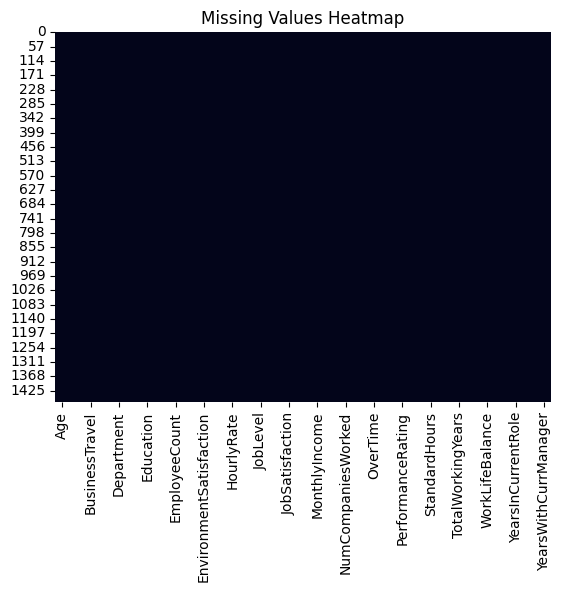

In [8]:
sns.heatmap(dt.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
dt= pd.get_dummies(dt)

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   bool 
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   HourlyRate                         1470 non-null   int64
 5   JobLevel                           1470 non-null   int64
 6   MonthlyIncome                      1470 non-null   int64
 7   MonthlyRate                        1470 non-null   int64
 8   NumCompaniesWorked                 1470 non-null   int64
 9   PercentSalaryHike                  1470 non-null   int64
 10  StockOptionLevel                   1470 non-null   int64
 11  TotalWorkingYears                  1470 non-null   int64
 12  TrainingTimesLastYea

In [ ]:
sns.heatmap(dt.corr(), cmap="Spectral")

In [12]:
pd.set_option('display.max_rows', None)

In [ ]:
dt.corr()['Attrition'].sort_values(ascending=False)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
EnvironmentSatisfaction_1            0.122819
JobInvolvement_1                     0.117161
BusinessTravel_Travel_Frequently     0.115143
WorkLifeBalance_1                    0.098689
JobRole_Laboratory Technician        0.098290
JobSatisfaction_1                    0.090329
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
RelationshipSatisfaction_1           0.059222
EducationField_Marketing             0.055781
JobInvolvement_2                     0.044731
NumCompaniesWorked                   0.043494
EducationField_Human Resources       0.036466
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
Education_3                          0.025723
Education_1                       

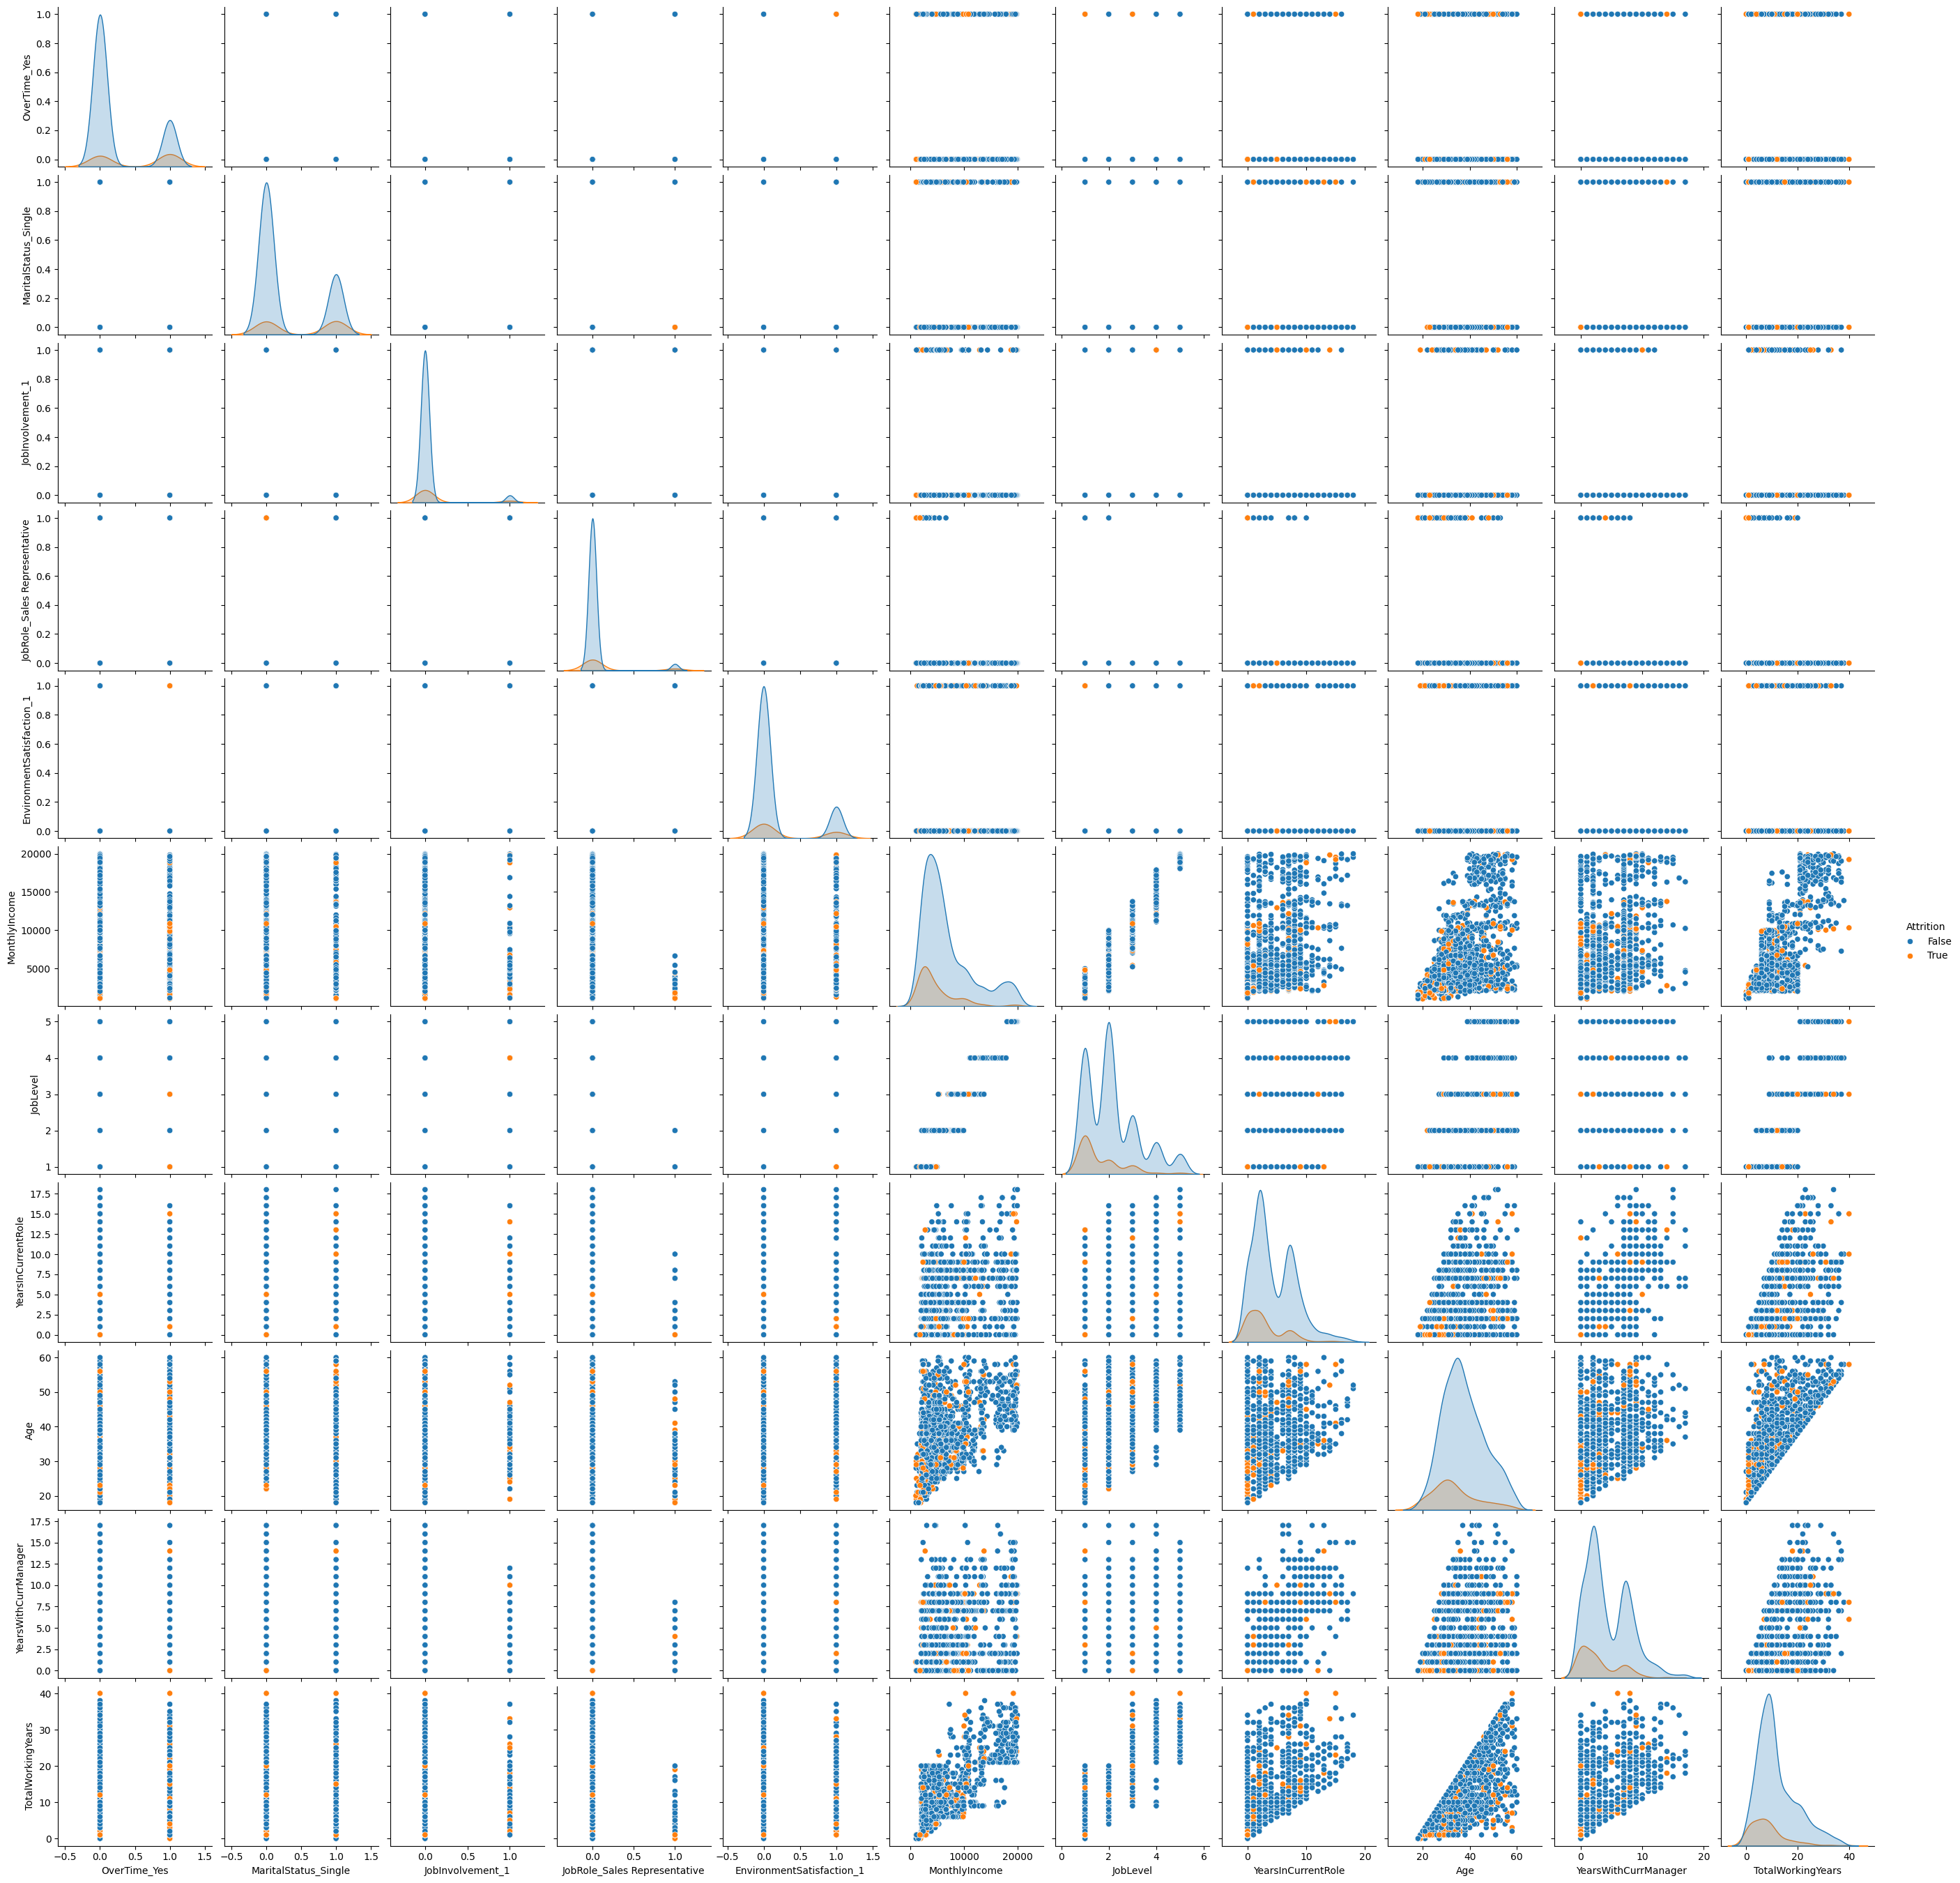

In [ ]:
sns.pairplot(dt[['OverTime_Yes','MaritalStatus_Single','JobInvolvement_1', 'JobRole_Sales Representative','EnvironmentSatisfaction_1','MonthlyIncome','JobLevel','YearsInCurrentRole','Age','YearsWithCurrManager','TotalWorkingYears','Attrition']],hue='Attrition')
#Employees who frequently work overtime are more likely to resign.
#There's a notable trend of employees exiting the company after 14 to 16 years of service.
#Higher job levels seem to correlate with lower attrition rates, indicating greater job retention as employees advance.
#The age group with the highest attrition rate appears to be around 40 years old.

<Axes: >

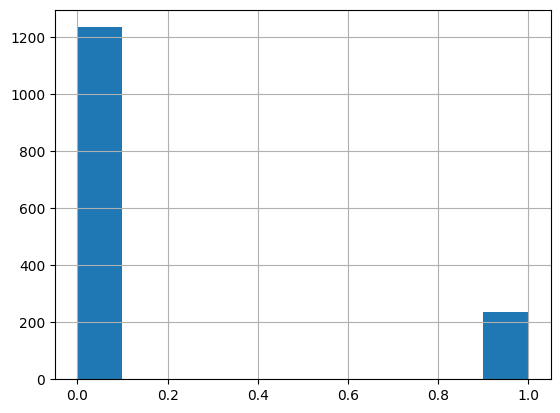

In [ ]:
dt['Attrition'].hist()


4. Pre-process the dataset
5. Split the data into training/test datasets (70/30)

4 pts.

In [ ]:
X = dt.drop('Attrition',axis=1).values
y = dt['Attrition'].values

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

6. Build a sequential neural network with the following parameters: 3 hidden dense layers - 100, 50, 25 nodes respectively, activation function = 'relu', dropout = 0.5 for each layer).
7. Use early stopping callback to prevent overfitting.

7 pts.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout

In [ ]:
#when unit=1 layer activation is sigmoid gives the best result.
model = Sequential()
model.add(Dense(units=100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          batch_size=128,
          epochs=200,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/200
9/9 [==============================] - 2s 43ms/step - loss: 0.5794 - val_loss: 0.4877
Epoch 2/200
9/9 [==============================] - 0s 10ms/step - loss: 0.5207 - val_loss: 0.4546
Epoch 3/200
9/9 [==============================] - 0s 11ms/step - loss: 0.4856 - val_loss: 0.4466
Epoch 4/200
9/9 [==============================] - 0s 10ms/step - loss: 0.4810 - val_loss: 0.4442
Epoch 5/200
9/9 [==============================] - 0s 11ms/step - loss: 0.4723 - val_loss: 0.4375
Epoch 6/200
9/9 [==============================] - 0s 12ms/step - loss: 0.4657 - val_loss: 0.4336
Epoch 7/200
9/9 [==============================] - 0s 12ms/step - loss: 0.4760 - val_loss: 0.4332
Epoch 8/200
9/9 [==============================] - 0s 10ms/step - loss: 0.4456 - val_loss: 0.4314
Epoch 9/200
9/9 [==============================] - 0s 12ms/step - loss: 0.4427 - val_loss: 0.4246
Epoch 10/200
9/9 [==============================] - 0s 13ms/step - loss: 0.4261 - val_loss: 0.4183
Epoch 11/200
9/9 [=

8. Plot training and validation losses versus epochs.
9. Print out model confusion matrix.
10. Print out model classification report.
11. Print out model ROC AUC.

4 pts.

<Axes: >

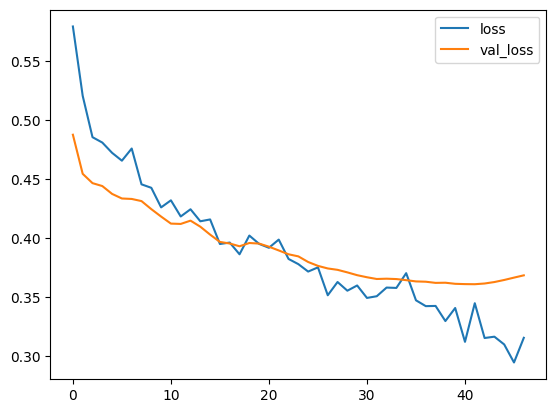

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

14/14 [==============================] - 0s 5ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[359   5]
 [ 64  13]]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix, roc_auc_score

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       364
           1       0.72      0.17      0.27        77

    accuracy                           0.84       441
   macro avg       0.79      0.58      0.59       441
weighted avg       0.83      0.84      0.80       441



14/14 [==============================] - 0s 6ms/step


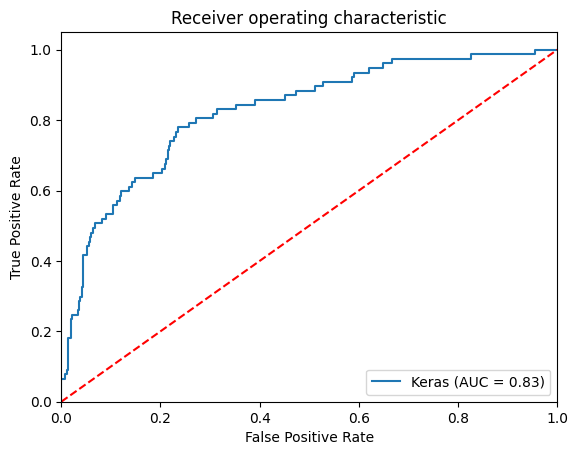

In [ ]:
# ROC AUC and ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

roc_auc_score = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure()
plt.plot(fpr, tpr, label='Keras (AUC = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Keras_ROC')
plt.show()
